In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fastprogress import master_bar, progress_bar
from time import sleep

## Basic use

In [3]:
mb = master_bar(range(10))
for i in mb:
    for j in progress_bar(range(100), parent=mb):
        sleep(0.01)
        mb.child.comment = f'second bar stat'
    mb.first_bar.comment = f'first bar stat'
    mb.write(f'Finished loop {i}.')
    #mb.update_graph(graphs, x_bounds, y_bounds)

## Adding the graph

In [4]:
import numpy as np

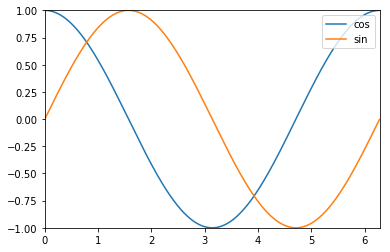

In [5]:
mb = master_bar(range(10))
#Name of the curves to put in the legend box.
mb.names = ['cos', 'sin']
for i in mb:
    for j in progress_bar(range(100), parent=mb):
        sleep(0.01)
        mb.child.comment = f'second bar stat'
    mb.first_bar.comment = f'first bar stat'
    mb.write(f'Finished loop {i}.')
    x = np.arange(0, 2*(i+1)*np.pi/10, 0.01)
    y1, y2 = np.cos(x), np.sin(x)
    graphs = [[x,y1], [x,y2]]
    #Specifying the boundaries is better to have the box at the right size.
    x_bounds = [0, 2*np.pi]
    y_bounds = [-1,1]
    mb.update_graph(graphs, x_bounds, y_bounds)

Updating every iteration in the inner loop is possible but slower

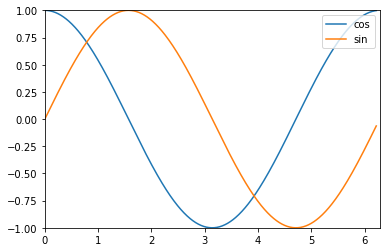

In [6]:
mb = master_bar(range(10))
mb.names = ['cos', 'sin']
for i in mb:
    for j in progress_bar(range(100), parent=mb):
        if j%10 == 0:
            k = 100 * i + j
            x = np.arange(0, 2*k*np.pi/1000, 0.01)
            y1, y2 = np.cos(x), np.sin(x)
            graphs = [[x,y1], [x,y2]]
            x_bounds = [0, 2*np.pi]
            y_bounds = [-1,1]
            mb.update_graph(graphs, x_bounds, y_bounds)
            mb.child.comment = f'second bar stat'
    mb.first_bar.comment = f'first bar stat'
    mb.write(f'Finished loop {i}.')

## Console rendering

In [7]:
from fastprogress.fastprogress import ConsoleMasterBar, ConsoleProgressBar 

In [8]:
mb = ConsoleMasterBar(range(10))
for i in mb:
    for j in ConsoleProgressBar(range(100), parent=mb):
        sleep(0.01)
        mb.child.comment = f'second bar stat'
    mb.write(f'Finished loop {i}.')

Finished loop 0.                                                                                                        
Finished loop 1.                                                                                                        
Finished loop 2.                                                                                                        
Finished loop 3.                                                                                                        
Finished loop 4.                                                                                                        
Finished loop 5.                                                                                                        
Finished loop 6.                                                                                                        
Finished loop 7.                                                                                                        
Finished loop 8.                

You can force the console rendering without changing your code by using the following command:

In [9]:
from fastprogress import force_console_behavior
master_bar,progress_bar = force_console_behavior()

In [10]:
mb = master_bar(range(10))
for i in mb:
    for j in progress_bar(range(100), parent=mb):
        sleep(0.01)
        mb.child.comment = f'second bar stat'
    mb.first_bar.comment = f'first bar stat'
    mb.write(f'Finished loop {i}.')
    #mb.update_graph(graphs, x_bounds, y_bounds)

Finished loop 0.                                                                                                        
Finished loop 1.                                                                                                        
Finished loop 2.                                                                                                        
Finished loop 3.                                                                                                        
Finished loop 4.                                                                                                        
Finished loop 5.                                                                                                        
Finished loop 6.                                                                                                        
Finished loop 7.                                                                                                        
Finished loop 8.                